# Importazione librerie e visualizzazione Dataset

In [1]:
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
#Lettura del dataset:
df_trump = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv",lineterminator='\n')
df_biden = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv",lineterminator='\n')

In [3]:
print(f"Tweet with Trump hashtag: {len(df_trump)}")
print(f"Tweet with Biden hashtag: {len(df_biden)}")

Tweet with Trump hashtag: 970919
Tweet with Biden hashtag: 776886


In [4]:
#Dataframe unito (eliminati i duplicati)
df_duplicated = pd.concat([df_trump,df_biden])
df = df_duplicated.drop_duplicates(subset="tweet")

print(f"Total tweets: {len(df_duplicated)}")
print(f"Total tweets: {len(df)}")

Total tweets: 1747805
Total tweets: 1507205


In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
#Numero di utenti totali (potenziali nodi)
print(df["user_id"].value_counts())

In [ ]:
from collections import Counter
import re

def extract_hashtags(tweet):
    return re.findall(r'#\w+', tweet.lower())

df['hashtags'] = df['tweet'].apply(extract_hashtags)

all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]

hashtag_counts = Counter(all_hashtags)

sorted_hashtag_counts = hashtag_counts.most_common()

# Stampare la classifica degli hashtag
print("Classifica degli hashtag più usati:")
for hashtag, count in sorted_hashtag_counts[:50]:
    print(f"{hashtag}: {count}")

Osservazioni:
- Informazioni temporali che vanno dal 15 ottobre 2020 al 8 novembre 2020.
- 481.000 potenziali nodi (filtraggio sulla base di like/retweet?)
- Tweet scritti in diverse lingue (concentrarsi solo su quelli in inglese?)
- Diversi valori mancanti nelle aree geografiche

# Preprocessing (filtraggio tweet/utenti)

Probabilmente il primo filtraggio che occorre fare è quello sulla lingua. Potrebbe essere meglio considerare solo i tweet in inglese (?)

In [ ]:
#Filtraggio sulla base dei like
df_like_5 = df[df["likes"]>=5]
df_like_10 = df[df["likes"]>=10]
df_like_20 = df[df["likes"]>=20]
df_like_50 = df[df["likes"]>=50]

print(f"Total tweets: {len(df_like_5)}")
print(f"Total tweets: {len(df_like_10)}")
print(f"Total tweets: {len(df_like_20)}")
print(f"Total tweets: {len(df_like_50)}")
print(df_like_50["user_id"].value_counts())

In [ ]:
#Filtraggio sulla base dei retweet
df_retweet_5 = df[df["retweet_count"]>=5]
df_retweet_10 = df[df["retweet_count"]>=10]
df_retweet_20 = df[df["retweet_count"]>=20]
df_retweet_50 = df[df["retweet_count"]>=50]

print(f"Total tweets: {len(df_retweet_5)}")
print(f"Total tweets: {len(df_retweet_10)}")
print(f"Total tweets: {len(df_retweet_20)}")
print(f"Total tweets: {len(df_retweet_50)}")
print(df_retweet_50["user_id"].value_counts())

In [6]:
#FILTRAGGIO BASATO SU paese=United states
df_country= df[df["country"]=="United States of America"]
print(f"Total tweets: {len(df_country)}")
# Calcolare e stampare il numero di utenti unici
unique_users = df_country["user_id"].nunique()
print(f"Total unique users: {unique_users}")

df_country.tail()

Total tweets: 297754
Total unique users: 76160


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
776827,2020-11-08 23:54:14,1.325587e+18,George W. #Bush #Congratulates #Biden And Harr...,1.0,1.0,Twitter for iPhone,4.938816e+07,Carol Falk,CAFalk,https://t.co/uuyj7Dnata Activist: #Resistance ...,...,24052.0,Wisconsin,44.430898,-89.688464,NaN,United States of America,North America,Wisconsin,WI,2020-11-09 18:32:45.705803
776845,2020-11-08 23:56:15,1.325588e+18,Will #criticalRaceTheory become ubiquitous in ...,0.0,0.0,Twitter Web App,4.095715e+08,Howard Wachtel,mindovermath,Retired college #math professor. Single. Brid...,...,12606.0,"Philadelphia, PA",39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:45.773127
776847,2020-11-08 23:56:21,1.325588e+18,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P,0.0,0.0,Twitter for iPhone,1.914600e+08,Sean Lassiter,IAmSeanLassiter,Sean Lassiter Photography,...,803.0,Philadelphia PA,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:45.731141
776865,2020-11-08 23:58:24,1.325589e+18,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,0.0,Twitter for iPhone,5.545625e+07,Caroline Billinson,cbillinson,my love language is dismantling the patriarchy.,...,436.0,"Washington, DC",38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-11-09 18:32:45.841439
776870,2020-11-08 23:58:48,1.325589e+18,The man needs some help...#usa #biden\nWhen wi...,0.0,0.0,Twitter for Android,1.248047e+18,Dr J,DrJoeMcCarthy,Human. Free Thinker. Met Mandela. Personal. Fa...,...,311.0,Earth. 3rd Planet from Sun.,43.519630,-114.315320,NaN,United States of America,North America,Idaho,ID,2020-11-09 18:32:45.641087


In [40]:
#FILTRAGGIO BASATO SU stato!=null
df_state= df_country[pd.notnull(df_country['state'])]
print(f"Total tweets: {len(df_state)}")

unique_users = df_state["user_screen_name"].nunique()
print(f"utenti negli USA con stato!=null: {unique_users}")

Total tweets: 297728
utenti negli USA con stato!=null: 76268


Osservazione: sono pochi gli utenti che risiedono negli stati uniti e che hanno state==null

# Costruisco la rete con le menzioni

* Obiettivo: costruire una rete che tenga conto delle menzioni che provengono da utenti USA con più di 15.000 followers (potenzialmente i più influenti).
* Obiettivo: costruire una rete che tenga conto delle menzioni che provengono da utenti USA con meno di 1.000 followers, studiamo comportamento tipico di persone meno famose.
* Misurazione delle principali misure di centralità: in_degree, betweness, closeness.
* Si potrebbe verificare con l'out_degree se sono presenti spam_farm (to do)
* Degree distribution (to do)
* Page rank (to do)

In [ ]:
popular = False #se true, considero rete con >15.000 followers, se false considero rete con <1.000 followers

#FILTRAGGIO BASATO SU stato= United states e sul numero di follower, voglio capire se ci sono
#utenti importanti o se ho completamente rimosso profili di informazione
if popular:
    df_country_e_follower= df_country[df_country["user_followers_count"]>=15000]
else:
    df_country_e_follower= df_country[df_country["user_followers_count"]<1000]
print(f"Total tweets: {len(df_country_e_follower)}")
print(df_country_e_follower["user_id"].value_counts())
df_country_e_follower.tail()


# preparo file json con riassunti dei tweet concatenati

aggiungo un ulteriore filtro sui follower 

In [45]:
df_state_follower= df_state[df_state["user_followers_count"]>=1550]
print(f"Total tweets: {len(df_state_follower)}")

unique_users = df_state_follower["user_screen_name"].nunique()
print(f"utenti negli USA con stato!=null: {unique_users}")

Total tweets: 99912
utenti negli USA con stato!=null: 14980


In [46]:
#Concatenazione dei tweet per l'utente
grouped_df = df_state_follower.groupby('user_screen_name')['tweet'].apply(lambda tweets: ' '.join(tweets)).reset_index()
print(f"Total tweets after concate: {len(grouped_df)}")


Total tweets after concate: 14980


In [47]:
grouped_df.head()

,user_screen_name,tweet
0,007__NIL,@CatEyezGreen_ @nudog71 @pressec We need the ...
1,00Emilyjane,Goodnight to the gays and the Biden supporters...
2,00EvanMichael,Just #Biden the time w/ @SteveKornacki ... #El...
3,02deebo,@BNODesk Something #Trump can truly take credi...
4,05e9d20d8cd6400,This is an election of good vs evil...\nTrump....


In [52]:
es_tweet = df_state_follower[df_state_follower['user_screen_name'] == '007__NIL']['tweet']

print(f"Tweet dell'utente prima della concatenazione: {es_tweet.iloc[0]}")
print(f"Tweet dell'utente prima della concatenazione: {es_tweet.iloc[1]}")

Tweet dell'utente prima della concatenazione: @CatEyezGreen_ @nudog71 @pressec We need  the willingness of the people that actually can do shit to start to crumble as they realize they might not get away with this shit.. hence the need for the #JoeBiden landslide 🗽
Tweet dell'utente prima della concatenazione: @Lorrain22492203 @hermitme1 The senators re-elections are joined at the hip with Trump’s fate.. or many of them are. Hence we need a #JoeBiden landslide


In [51]:
es_tweet = grouped_df[grouped_df['user_screen_name'] == '007__NIL']['tweet']

print(f"Tweet dell'utente DOPO la concatenazione: {es_tweet.iloc[0]}")

Tweet dell'utente DOPO la concatenazione: @CatEyezGreen_ @nudog71 @pressec We need  the willingness of the people that actually can do shit to start to crumble as they realize they might not get away with this shit.. hence the need for the #JoeBiden landslide 🗽 @Lorrain22492203 @hermitme1 The senators re-elections are joined at the hip with Trump’s fate.. or many of them are. Hence we need a #JoeBiden landslide @lib_owned Bob tried to run Sally off the Road and intimidate her at gunpoint

Be like Sally                   
Vote for #JoeBiden Trump is like the Boss Level Racist at the end of this game.
Let’s get this done Vote #JoeBiden


In [58]:
count=0
for row in tqdm(grouped_df.itertuples(index=True, name='Pandas')): #df_filtered
    if (len(row.tweet)>Threshold):
        count+=1
print(count)

14980it [00:00, 420339.55it/s]

13911


In [53]:
from transformers import pipeline
import json
import torch
from tqdm import tqdm

device = 0 if torch.cuda.is_available() else -1

summarizer = pipeline(task="summarization", model="google-t5/t5-base", tokenizer="google-t5/t5-base", device=device)

#3000 non va bene, probabilmente occorre abbassarla ulteriormente
Threshold = 3000 #soglia sul numero di caratteri, se viene superata questa soglia, il testo viene riassunto

filename="/kaggle/working/summarization.json"
summarized = []

for row in tqdm(grouped_df.itertuples(index=True, name='Pandas')): #df_filtered
    if (len(row.tweet)>Threshold):
        text = row.tweet
        if (len(row.tweet)>10000): #se il testo è oltre i 10.000 caratteri, lo tronco
            text = text[:10000]
        #print(text)
        resp = summarizer(text)
        #print(resp)
        record = {
            "user": row.user_screen_name,
            "summerized": resp[0]["summary_text"]
        }
        summarized.append(record)



2024-07-16 12:35:19.734950: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 12:35:19.735056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 12:35:19.870840: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

140it [00:22,  4.37it/s]You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
14980it [42:48,  5.83it/s]


In [59]:
#Notiamo che il numero di riassunti che vengono fatti è pari a 1069, poichè gli altri testi
#sono meno lunghi della soglia
count=0
for row in tqdm(grouped_df.itertuples(index=True, name='Pandas')): #df_filtered
    if (len(row.tweet)>Threshold):
        count+=1
print(count)

14980it [00:00, 438639.16it/s]

1069


In [54]:
# Scrivi i dati nel file JSON
with open(filename, 'w') as file:
    json.dump(summarized, file, indent=4)

In [61]:
# Funzione per caricare un file JSON
def load_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

# Specifica il percorso del file JSON sul tuo computer locale
#filename = "path_to_your_file/summarization.json"

# Carica i dati dal file JSON
data = load_json(filename)

# Crea un DataFrame pandas
df_riassunto = pd.DataFrame(data, columns=['user', 'summerized'])

# Rinomina le colonne
df_riassunto = df_riassunto.rename(columns={'user': 'user_screen_name', 'summerized': 'tweet'})

# DEVO AGGIUNGERE LE RIGHE CHE INVECE ERANO TWEET PIU CORTI DELLA SOGLIA E NON SONO STATI RIASSUNTI
# Soglia di lunghezza del tweet
Threshold = 3000

# Filtra le righe di grouped_df con tweet > 3000 caratteri
filtered_grouped_df = grouped_df[grouped_df['tweet'].str.len() <= Threshold]

# Concatenare df_riassunto con le righe filtrate
df_riassunto = pd.concat([df_riassunto, filtered_grouped_df], ignore_index=True)

# Stampa il DataFrame aggiornato
print(df_riassunto)
print(f"Total tweets: {len(df_riassunto)}")



      user_screen_name                                              tweet
0          1Chance2020  #Pennsylvania for #JoeBiden has extended his l...
1        1KMiddlebrook  #KeithMiddlebrook #Training Gear &amp; Apparel...
2       1legd_survivor  #tRUMP is a #crybaby, #lying #sackOfShit &amp;...
3        1stPragmatist  @realDonaldTrump @charliekirk11 #GOP #GOPHypoc...
4           22norsedad  @danishdamm @carlbernstein What i "gleaned" is...
...                ...                                                ...
14975         zugly747  The resurgence of the coronavirus in Europe ha...
14976         zuhair47  “No more blank checks for #Trump’s ‘favorite d...
14977      zurimabarba  A todos se les respeta su opinión, pero me per...
14978     zuuliebullie  #BarackObama Drains a 3-Point Shot Before #Mic...
14979           zzxyxy  Imagine if any #American citizen other than th...

[14980 rows x 2 columns]
Total tweets: 14980


In [55]:
import pandas as pd
import json

# Funzione per caricare un file JSON
def load_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

# Specifica il percorso del file JSON sul tuo computer locale
#filename="/kaggle/input/summarization/summarization.json"

# Carica i dati dal file JSON
data = load_json(filename)

# Crea un DataFrame pandas
df_riassunto= pd.DataFrame(data, columns=['user', 'summerized'])


# Rinomina le colonne
df_riassunto= df_riassunto.rename(columns={'user': 'user_screen_name', 'summerized': 'tweet'})



# Definisci il valore soglia per la lunghezza del tweet
Threshold = 3000

# Controlla se ci sono tweet con più di 3000 caratteri
for index, row in df_riassunto.iterrows():
    if len(row['tweet']) > Threshold:
        print(f"Tweet con più di 3000 caratteri per l'utente {row['user_screen_name']}")

# Ora puoi utilizzare df_sampled per ulteriori operazioni o analisi
print(df_riassunto.head())  # Stampare le prime righe del DataFrame per verificare


  user_screen_name                                              tweet
0      1Chance2020  #Pennsylvania for #JoeBiden has extended his l...
1    1KMiddlebrook  #KeithMiddlebrook #Training Gear &amp; Apparel...
2   1legd_survivor  #tRUMP is a #crybaby, #lying #sackOfShit &amp;...
3    1stPragmatist  @realDonaldTrump @charliekirk11 #GOP #GOPHypoc...
4       22norsedad  @danishdamm @carlbernstein What i "gleaned" is...


questo non è stato riassunto perche è breve, trovane uno riassunto 

In [63]:
es_tweet = df_riassunto[df_riassunto['user_screen_name'] == '007__NIL']['tweet']

print(f"Tweet dell'utente DOPO RIASSUNTO: {es_tweet.iloc[0]}")

Tweet dell'utente DOPO RIASSUNTO: @CatEyezGreen_ @nudog71 @pressec We need  the willingness of the people that actually can do shit to start to crumble as they realize they might not get away with this shit.. hence the need for the #JoeBiden landslide 🗽 @Lorrain22492203 @hermitme1 The senators re-elections are joined at the hip with Trump’s fate.. or many of them are. Hence we need a #JoeBiden landslide @lib_owned Bob tried to run Sally off the Road and intimidate her at gunpoint

Be like Sally                   
Vote for #JoeBiden Trump is like the Boss Level Racist at the end of this game.
Let’s get this done Vote #JoeBiden


# rete preferenze
ora ho in df_sampled.head gli utenti con i tweet riassunti, uso llama3 per ottenere le preferenze politiche

In [64]:
import subprocess
import threading

!pip install langchain-community
!pip install langchain-core

#istallazione di ollama
!curl -fsSL https://ollama.com/install.sh | sh
    
#Avvio del server locale di Ollama
t = threading.Thread(target=lambda: subprocess.run(["ollama", "serve"]),daemon=True)
t.start()

!ollama pull llama3

t2 = threading.Thread(target=lambda: subprocess.run(["ollama", "run", "llama3"]),daemon=True)
t2.start()

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.6/987.6 kB 27.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.5/366.5 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: orjson
    Found existing installation: orjson 3.9.10
    Uninstalling orjson-3.9.10:
      Successfully uninstalled orjson-3.9.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behav

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


>>> Downloading ollama...
######################################################################## 100.0%#=#=#                                                                          
>>> Installing ollama to /usr/local/bin...
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
Couldn't find '/root/.ollama/id_ed25519'. Generating new private key.
Your new public key is: 

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIJ81fTVFBxUzhgpAfL/2B2L6M+Tl0iRBPtT7FQEf/GbF



/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
2024/07/16 13:50:47 routes.go:965: INFO server config env="map[CUDA_VISIBLE_DEVICES: GPU_DEVICE_ORDINAL: HIP_VISIBLE_DEVICES: HSA_OVERRIDE_GFX_VERSION: OLLAMA_DEBUG:false OLLAMA_FLASH_ATTENTION:false OLLAMA_HOST:http://127.0.0.1:11434 OLLAMA_INTEL_GPU:false OLLAMA_KEEP_ALIVE:5m0s OLLAMA_LLM_LIBRARY: OLLAMA_MAX_LOADED_MODELS:0 OLLAMA_MAX_QUEUE:512 OLLAMA_MAX_VRAM:0 OLLAMA_MODELS:/root/.ollama/models OLLAMA_NOHISTORY:false OLLAMA_NOPRUNE:false OLLAMA_NUM_PARALLEL:0 OLLAMA_ORIGINS:[http://localhost https://localhost http://localhost:* https://localhost:* http://127.0.0.1 https://127.0.0.1 http://127.0.0.1:* https://127.0.0.1:* http://0.0.0.0 https://0.0.0.0 http://0.0.0.0:* https://0.0.0.0:* app://* file://* tauri://*] OLLAMA_RUNNERS_DIR: OLLAMA_SCHED_SPREAD:false OLLAMA_TMPD

[GIN] 2024/07/16 - 13:50:52 | 200 |      48.856µs |       127.0.0.1 | HEAD     "/"


time=2024-07-16T13:50:52.877Z level=INFO source=payload.go:44 msg="Dynamic LLM libraries [cpu_avx cpu_avx2 cuda_v11 rocm_v60101 cpu]"
time=2024-07-16T13:50:52.877Z level=INFO source=gpu.go:205 msg="looking for compatible GPUs"
time=2024-07-16T13:50:52.989Z level=INFO source=types.go:105 msg="inference compute" id=GPU-27356077-3003-5b8b-ac16-13f2e39bdcf0 library=cuda compute=6.0 driver=12.4 name="Tesla P100-PCIE-16GB" total="15.9 GiB" available="1.7 GiB"


pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠴ pulling manifest 
pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  

time=2024-07-16T13:50:54.512Z level=INFO source=download.go:136 msg="downloading 6a0746a1ec1a in 47 100 MB part(s)"


pulling manifest 
pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕                ▏  14 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   1% ▕                ▏  35 MB/4.7 GB                  pulling manifest 
pulling 6a07

time=2024-07-16T13:51:13.374Z level=INFO source=download.go:136 msg="downloading 4fa551d4f938 in 1 12 KB part(s)"


pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938...   0% ▕                ▏    0 B/ 12 KB                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938...   0% ▕                ▏    0 B/ 12 KB                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938...   0% ▕                ▏    0 B/ 12 KB                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938...   0% ▕                ▏    0 B/ 12 KB                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938...   0% ▕                ▏    0 B/ 12 KB                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f

time=2024-07-16T13:51:15.216Z level=INFO source=download.go:136 msg="downloading 8ab4849b038c in 1 254 B part(s)"


pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c...   0% ▕                ▏    0 B/ 254 B                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c...   0% ▕                ▏    0 B/ 254 B                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c...   0% ▕                ▏    0 B/ 254 B                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c...   0% ▕                ▏    

time=2024-07-16T13:51:17.049Z level=INFO source=download.go:136 msg="downloading 577073ffcc6c in 1 110 B part(s)"


pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c... 100% ▕████████████████▏  254 B                         
pulling 577073ffcc6c...   0% ▕                ▏    0 B/ 110 B                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c... 100% ▕████████████████▏  254 B                         
pulling 577073ffcc6c...   0% ▕                ▏    0 B/ 110 B                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c... 100% ▕████████████████▏  254 B                         
pulling 577073ffcc6c...   0% ▕                ▏    0 B/ 110 B       

time=2024-07-16T13:51:23.870Z level=INFO source=download.go:136 msg="downloading 3f8eb4da87fa in 1 485 B part(s)"


pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c... 100% ▕████████████████▏  254 B                         
pulling 577073ffcc6c... 100% ▕████████████████▏  110 B                         
pulling 3f8eb4da87fa...   0% ▕                ▏    0 B/ 485 B                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c... 100% ▕████████████████▏  254 B                         
pulling 577073ffcc6c... 100% ▕████████████████▏  110 B                         
pulling 3f8eb4da87fa...   0% ▕                ▏    0 B/ 485 B                  pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB              

⠙ time=2024-07-16T13:51:39.257Z level=INFO source=memory.go:309 msg="offload to cuda" layers.requested=-1 layers.model=33 layers.offload=4 layers.split="" memory.available="[1.7 GiB]" memory.required.full="5.5 GiB" memory.required.partial="1.7 GiB" memory.required.kv="256.0 MiB" memory.required.allocations="[1.7 GiB]" memory.weights.total="3.9 GiB" memory.weights.repeating="3.5 GiB" memory.weights.nonrepeating="411.0 MiB" memory.graph.full="164.0 MiB" memory.graph.partial="677.5 MiB"
time=2024-07-16T13:51:39.258Z level=INFO source=server.go:383 msg="starting llama server" cmd="/tmp/ollama2804373592/runners/cuda_v11/ollama_llama_server --model /root/.ollama/models/blobs/sha256-6a0746a1ec1aef3e7ec53868f220ff6e389f6f8ef87a01d77c96807de94ca2aa --ctx-size 2048 --batch-size 512 --embedding --log-disable --n-gpu-layers 4 --parallel 1 --port 45659"
time=2024-07-16T13:51:39.259Z level=INFO source=sched.go:437 msg="loaded runners" count=1
time=2024-07-16T13:51:39.259Z level=INFO source=server.go

INFO [main] model loaded | tid="136480590225408" timestamp=1721138008
[GIN] 2024/07/16 - 13:53:28 | 200 |         1m49s |       127.0.0.1 | POST     "/api/generate"


⠇ time=2024-07-16T13:53:28.960Z level=INFO source=server.go:617 msg="llama runner started in 109.70 seconds"


In [65]:
from langchain_community.llms import Ollama
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt = "You are a political classifier analyzing tweets about the USA election. Your task is to determine if a user's tweet is Pro-Biden, Pro-Trump, Neutral or X. A tweet is Neutral if it does not clearly support either candidate. If a tweet contains offensive language, classify it as X. Provide ONLY the class (Pro-Biden, Pro-Trump, Neutral or X) for EACH tweet without any additional text."
llm = Ollama(
    model="llama3"
)  # assuming you have Ollama installed and have llama3 model pulled with `ollama pull llama3`

template = ChatPromptTemplate.from_messages([
    ("system", prompt),
    ("user", "{input}"),
])

output_parser = StrOutputParser()

def preference_llama(tweet):
    response = llm.invoke(prompt + " Tweet:" + tweet)
    return response


In [66]:
import json
import time

# Specifica il nome del file JSON
filename = '/kaggle/working/preferences.json'
records = []

for index, row in df_riassunto.iterrows(): 
    resp = preference_llama(row.tweet)
    record = {
        "user": row.user_screen_name,
        "class": resp
    }
    records.append(record)


[GIN] 2024/07/16 - 13:54:25 | 200 |  3.203460244s |       127.0.0.1 | POST     "/api/generate"
[GIN] 2024/07/16 - 13:54:27 | 200 |  2.313614883s |       127.0.0.1 | POST     "/api/generate"
[GIN] 2024/07/16 - 13:54:30 | 200 |   2.76495227s |       127.0.0.1 | POST     "/api/generate"
[GIN] 2024/07/16 - 13:54:33 | 200 |  2.744884022s |       127.0.0.1 | POST     "/api/generate"
[GIN] 2024/07/16 - 13:54:35 | 200 |  2.317180144s |       127.0.0.1 | POST     "/api/generate"
[GIN] 2024/07/16 - 13:54:37 | 200 |  2.298814811s |       127.0.0.1 | POST     "/api/generate"
[GIN] 2024/07/16 - 13:54:39 | 200 |  1.747214556s |       127.0.0.1 | POST     "/api/generate"
[GIN] 2024/07/16 - 13:54:41 | 200 |   2.17052084s |       127.0.0.1 | POST     "/api/generate"
[GIN] 2024/07/16 - 13:54:44 | 200 |  2.162810897s |       127.0.0.1 | POST     "/api/generate"
[GIN] 2024/07/16 - 13:54:46 | 200 |  2.764950754s |       127.0.0.1 | POST     "/api/generate"
[GIN] 2024/07/16 - 13:54:49 | 200 |  2.785950393s 

KeyboardInterrupt: 

nb: ho stoppato l'esecuzione perchè ci metteva troppo, con 3-4 sec a persona ci metteva 12h. in 3h ho ottenuto la preferenza di 2556 utenti ed effettivamente rispecchia la ground trouth

In [67]:

# Scrivi i dati nel file JSON
with open(filename, 'w') as file:
    json.dump(records,file)

In [69]:
# Funzione per caricare un file JSON
def load_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

# Specifica il percorso del file JSON sul tuo computer locale
#filename = ""

# Carica i dati dal file JSON
data = load_json(filename)

# Crea un DataFrame pandas
df_preferenze = pd.DataFrame(data, columns=['user', 'class'])

# Rinomina le colonne
df_preferenze = df_preferenze.rename(columns={'user': 'user_screen_name', 'class': 'class'})

In [70]:
df_preferenze.head()

,user_screen_name,class
0,1Chance2020,Pro-Biden
1,1KMiddlebrook,Pro-Trump
2,1legd_survivor,Pro-Biden
3,1stPragmatist,Pro-Biden
4,22norsedad,Pro-Trump


In [79]:
# Unisci i DataFrame sulla colonna 'user_screen_name'
df_merged = pd.merge(df_preferenze, df_state_follower[['user_screen_name', 'state']], on='user_screen_name', how='left')
# Rimuovi i duplicati basati su 'user_screen_name' mantenendo l'ultima occorrenza
df_merged_unique = df_merged.drop_duplicates(subset='user_screen_name', keep='last')
print(f"Total tweets: {len(df_merged_unique)}")

Total tweets: 2566


In [75]:
df_merged.tail()

,user_screen_name,class,state
65872,Chemnipot,Pro-Biden,District of Columbia
65873,Chemnipot,Pro-Biden,District of Columbia
65874,Cherib1965,Pro-Trump,Michigan
65875,Cherib1965,Pro-Trump,Michigan
65876,Cheryl05397860,Pro-Biden,Ohio


In [78]:
df_merged_unique.tail()


,user_screen_name,class,state
65870,ChelseaLaurenLA,Pro-Trump,California
65871,ChemistCraig,Pro-Biden,Illinois
65873,Chemnipot,Pro-Biden,District of Columbia
65875,Cherib1965,Pro-Trump,Michigan
65876,Cheryl05397860,Pro-Biden,Ohio


In [89]:

# Contare le occorrenze delle classi per ogni stato
df_counts = df_merged_unique.groupby(['state', 'class']).size().unstack(fill_value=0).reset_index()

# Assicurati che tutte le colonne siano presenti anche se non ci sono occorrenze
for col in ['Pro-Biden', 'Pro-Trump', 'Neutral', 'X']:
    if col not in df_counts.columns:
        df_counts[col] = 0

# Ordina le colonne
df_counts = df_counts[['state', 'Pro-Biden', 'Pro-Trump', 'Neutral', 'X']]
print(df_counts)

class                 state  Pro-Biden  Pro-Trump  Neutral   X
0                   Alabama          6          5        0   1
1                    Alaska          2          3        1   0
2                   Arizona         17         20        7   4
3                  Arkansas          2          3        0   1
4                California        189        130       63  45
5                  Colorado         36         10        7   6
6               Connecticut         10          4        0   0
7                  Delaware          4          3        1   1
8      District of Columbia         62         40       38  11
9                   Florida         92         79       23  17
10                  Georgia         30         20        9   4
11                   Hawaii          5          4        1   6
12                    Idaho          2          2        1   0
13                 Illinois         48         20        8  11
14                  Indiana          8          7      

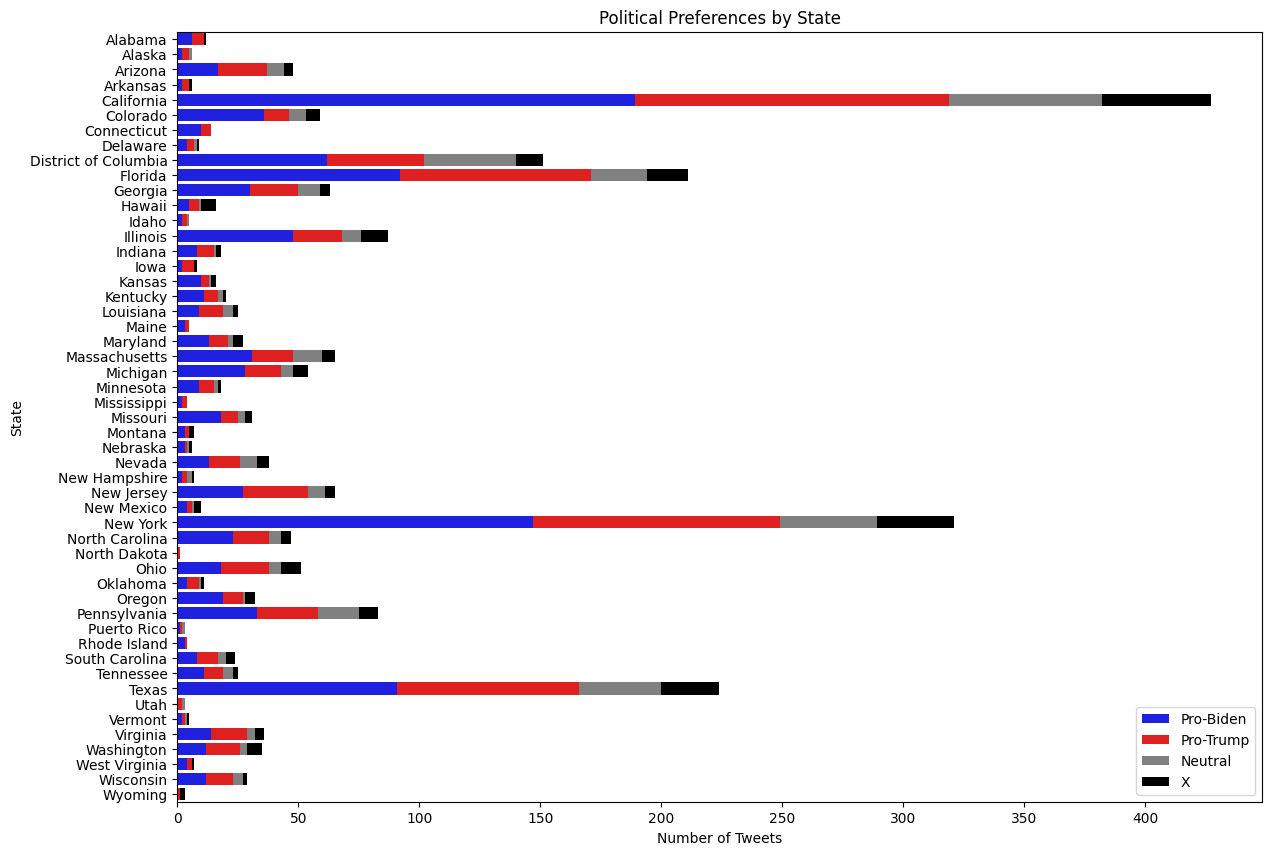

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# I dati del DataFrame df_counts devono essere già caricati qui

# Definizione dei colori per le categorie
colors = {'Pro-Biden': 'blue', 'Pro-Trump': 'red', 'Neutral': 'gray', 'X': 'black'}

# Creazione del grafico a barre impilato
plt.figure(figsize=(14, 10))  # Imposta la dimensione del grafico
sns.barplot(x='Pro-Biden', y='state', data=df_counts, color=colors['Pro-Biden'], label='Pro-Biden')
sns.barplot(x='Pro-Trump', y='state', data=df_counts, color=colors['Pro-Trump'], label='Pro-Trump', left=df_counts['Pro-Biden'])
sns.barplot(x='Neutral', y='state', data=df_counts, color=colors['Neutral'], label='Neutral', left=df_counts['Pro-Biden'] + df_counts['Pro-Trump'])
sns.barplot(x='X', y='state', data=df_counts, color=colors['X'], label='X', left=df_counts['Pro-Biden'] + df_counts['Pro-Trump'] + df_counts['Neutral'])

# Impostazioni del grafico
plt.xlabel('Number of Tweets')
plt.ylabel('State')
plt.title('Political Preferences by State')
plt.legend()

# Mostra il grafico
plt.show()


In [68]:
# Specifica il nome del file JSON
#filename = '/kaggle/working/preferences.json'

# Carica i dati dal file JSON
data = load_json(filename)

# Contatori per le classi
count_pro_biden = 0
count_pro_trump = 0
count_X=0
count_neutral = 0

# Itera attraverso i dati per contare le occorrenze di ciascuna classe
for item in data:
    if item['class'] == 'Pro-Biden':
        count_pro_biden += 1
    elif item['class'] == 'Pro-Trump':
        count_pro_trump += 1
    elif item['class'] == 'Neutral':
        count_neutral += 1
    else:
        count_X += 1

# Stampare i risultati
print(f"Numero di utenti Pro-Biden: {count_pro_biden}")
print(f"Numero di utenti Pro-Trump: {count_pro_trump}")
print(f"Numero di utenti Neutrali : {count_neutral}")
print(f"Numero di utenti X: {count_X}")

Numero di utenti Pro-Biden: 1103
Numero di utenti Pro-Trump: 794
Numero di utenti Neutrali : 332
Numero di utenti X: 337


# Costruisco la rete geografica
* è una rete non orientata
* Considero solo gli utenti negli USA e che hanno stato!=null
* Inserisco un arco tra gli utenti dello stesso stato
* Classifico ogni utente in pro-trump / pro-biden e lo coloro di rosso / blu
* Creazione dei sottografi: Utilizziamo G.subgraph(nodes) per creare sottografi per ciascuno stato, selezionando i nodi che appartengono a quel particolare stato.
* **Analisi degli stati con più sostenitori di Trump:** Conta il numero di nodi con preferenza politica "Trump" per ogni stato e stampa i risultati ordinati per numero decrescente.
* **Fornire una predizione dell'esito delle elezioni e confrontarlo con ground trouth**




**Costruzione rete**

In [ ]:
print(df.iloc[5]['tweet'])

classify_tweet(df.iloc[5]['tweet'])

In [ ]:
df_country_e_follower= df_country[df_country["user_followers_count"]<1000] #prendo gli utenti meno "popolari"
print(f"Total tweets: {len(df_country_e_follower)}")
print(df_country_e_follower["user_id"].value_counts())

#Concatenazione dei tweet per l'utente
grouped_df = df_country_e_follower.groupby('user_id')['tweet'].apply(lambda tweets: ' '.join(tweets)).reset_index()
print(f"Total tweets after concate: {len(grouped_df)}")

#Drop colonna tweet dal primo dataframe
df_dropped = df_country_e_follower.drop(columns=['tweet'])

#Faccio la join per avere tutti i tweet insieme
df_conc = pd.merge(df_dropped, grouped_df, on='user_id', how='inner')
print(df_conc["user_id"].value_counts())
df_conc.head()

In [ ]:
G_geo = nx.Graph() #NN orient

# Aggiungi nodi (utenti degli USA)
for index, row in df_conc.iterrows(): 
    if  pd.notnull(row['state']):
        political_preference=classify_tweet(row['tweet'])
        #print(political_preference)
        G_geo.add_node(row['user_screen_name'], state=row['state'],
                   political_preference=political_preference)

In [ ]:
#aggiunta archi
for u in G_geo.nodes():
    for v in G_geo.nodes():
        if u != v and G_geo.nodes[u]['state'] == G_geo.nodes[v]['state']:
            G_geo.add_edge(u, v, relationship='same_state')

In [ ]:
# Display the number of nodes and edges
print(f"Number of nodes: {G_geo.number_of_nodes()}")
print(f"Number of edges: {G_geo.number_of_edges()}")

In [ ]:
# Colorazione dei nodi in base alla political_preference
node_colors = []
for node in G_geo.nodes():
    if G_geo.nodes[node]['political_preference'] == 'pro-Biden' or G_geo.nodes[node]['political_preference'] == 'anti-Trump':
        node_colors.append('blue')  # Colore blu per i sostenitori di Biden
    elif G_geo.nodes[node]['political_preference'] == 'pro-Trump'or G_geo.nodes[node]['political_preference'] == 'anti-Biden':
        node_colors.append('red')   # Colore rosso per i sostenitori di Trump
    else:
        node_colors.append('gray')  # Colore grigio per i neutrali
        
# Disegna il grafo con i nodi colorati
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_geo, k=0.1)
nx.draw(G_geo, pos, with_labels=True, node_color=node_colors, node_size=20, font_size=0, font_color='black', edge_color='gray')


In [ ]:
"""
import matplotlib.cm as cm
import numpy as np

# Creazione dei sottografi per ciascuno stato
state_graphs = {}
for state in set(nx.get_node_attributes(G_geo, 'state').values()):
    state_graphs[state] = G_geo.subgraph([n for n, d in G_geo.nodes(data=True) if d['state'] == state])

# Disegna la rete con i cluster stati
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_geo, k=0.1)

# Genera una lista di colori
colors = cm.rainbow(np.linspace(0, 1, len(state_graphs)))

# Disegna i sottografi per ciascuno stato
for color, (state, subgraph) in zip(colors, state_graphs.items()):
    nx.draw_networkx_nodes(subgraph, pos, node_size=20, label=state, node_color=[color] * subgraph.number_of_nodes())
    nx.draw_networkx_edges(subgraph, pos, alpha=0.3)
    

plt.title('Rete sociale con cluster per stati')
plt.legend(state_graphs.keys())
plt.show()
"""

# Costruisco la rete di similarità con gli hashtag

Si pone il seguente problema: potrebbe non essere la scelta giusta andare a escludere utenti per numero di followers. Da un lato potremmo escludere il comportamento tipico degli utenti meno popolari, che sono anche quelli più numerosi (le persone comuni, che poi di fatto vanno a votare), dall'altro potremmo escludere il ruolo di utenti più popolari in grado di influenzare maggiormente gli altri utenti. Potremmo pensare di effettuare un campionamento casuale dei nodi per ridurre la dimensione della rete? Oppure dovremmo pensare al filtraggio sotto altri metodi (numero di like o retweet?). Potremmo fare anche un campionamento che si basa sulla degree distribution. Probabilmente la cosa migliore è andare a fare un campionamento casuale direttamente sul dataset.

In [ ]:
print(df_country["user_screen_name"].value_counts())


"""
df_country_e_follower= df_country[df_country["user_followers_count"]>10000] 
print(f"Total tweets: {len(df_country_e_follower)}")
print(df_country_e_follower["user_id"].value_counts())
"""

#Concatenazione dei tweet per l'utente
grouped_df = df_country.groupby('user_screen_name')['tweet'].apply(lambda tweets: ' '.join(tweets)).reset_index()
print(f"Total tweets after concate: {len(grouped_df)}")

#Drop colonna tweet dal primo dataframe
df_dropped = df_country.drop(columns=['tweet']) 

#Faccio la join per avere tutti i tweet insieme
df_conc = pd.merge(df_dropped, grouped_df, on='user_screen_name', how='inner')
print(len(df_conc))
print(df_conc["user_screen_name"].value_counts())
df_conc.head()

grouped_conc = df_country.groupby('user_screen_name')['tweet'].apply(lambda tweets: ' '.join(tweets)).reset_index()
print(grouped_conc["user_screen_name"].value_counts())

In [ ]:
# Effettuo un campionamento casuale del dataset (gli utenti sono troppi e non riusciremmo a costruire la rete)

df_sampled = grouped_conc.sample(frac=0.2, random_state=42)
print(df_sampled["user_screen_name"].value_counts())

df_sampled.head()
# Idea di altro campionamento: 
# stimo i degree in modo parallelo (calcolo similarità dei primi 100 utenti con tutti gli altri)
# campiono seguendo la stima della distribuzione

Osservazione: bisognerebbe forse creare dei macro-hashtag. Hashtag simili dovrebbero appartenere a un unico hashtag più generale. Per ora costruiamo la rete senza tener conto di questo.

In [ ]:
# Funzione per estrarre gli hashtag da un tweet
def extract_hashtags(tweet):
    return re.findall(r'#\w+', tweet.lower())

# Aggiungere una colonna con gli hashtag estratti
user_hashtags = df_sampled.copy()
user_hashtags['hashtags'] = df_sampled['tweet'].apply(extract_hashtags)

# Trasformo la lista di tweet in un insieme (per non avere duplicati)
user_hashtags["hashtags"] = user_hashtags['hashtags'].apply(set)

print(len(user_hashtags))
print(user_hashtags["user_screen_name"].value_counts())
user_hashtags.head()

In [ ]:
Threshold = 0.3

# Funzione per calcolare la similarità di Jaccard
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    if union == 0:
        return 0
    return intersection / union

df_final = user_hashtags.drop(columns=["tweet"])
# Calcolare la similarità di Jaccard tra ogni coppia di utenti
edges = []
for (user1, hashtags1), (user2, hashtags2) in combinations(user_hashtags.drop(columns=["tweet"]).itertuples(index=False), 2):
    similarity = jaccard_similarity(hashtags1, hashtags2)
    if similarity > Threshold:  # Aggiungere solo archi con similarità positiva
        edges.append((user1, user2, similarity))

# Creare un grafo vuoto
G = nx.Graph()

# Aggiungere nodi (utenti)
for user in df_final['user_screen_name']: 
    G.add_node(user)

# Aggiungere archi con pesi (similarità di Jaccard)
for user1, user2, weight in edges:
    G.add_edge(user1, user2, weight=weight)
    

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

In [ ]:
# Disegnare il grafo (non si capisce niente, troppi nodi dentro la rete)
pos = nx.spring_layout(G)  # Posizionamento dei nodi
weights = nx.get_edge_attributes(G, 'weight').values()

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=5, font_size=5, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}, font_color='red')
nx.draw_networkx_edges(G, pos, width=list(weights))

plt.show()

In [ ]:
# Plot della degree distribution

# Calcolare i gradi dei nodi
degrees = [degree for node, degree in G.degree()]

# Calcolare la distribuzione dei gradi
degree_count = Counter(degrees)
deg, cnt = zip(*degree_count.items())

# Fare il plot della distribuzione dei gradi
plt.figure(figsize=(8, 6))
plt.bar(deg, cnt, width=10, color='b')

plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.show()

Osserviamo la presenza di una power law, ma probabilmente ci sono 3 componenti giganti connesse! Provo a estrarre utenti che fanno parte di quelle componenti e vedo i loro hashtags per confermare la presenza di componenti giganti.

In [ ]:
print(degree_count)

In [ ]:
#Prendiamo gli utenti che hanno degree 998.

desired_degree = 767 #950, #767, #998

# Filtrare i nodi che hanno il grado specificato
nodes_with_desired_degree = [node for node, degree in degree_dict.items() if degree == desired_degree]

df_giant = df_final[df_final["user_screen_name"].isin(nodes_with_desired_degree)]
# Stampare i nodi con il grado desiderato
print(f"Nodi con grado {df_giant}:")
print(df_giant)

Come sospettato, le componenti connesse sono legate agli hashtag #trump, #biden, #joebiden

In [ ]:
# Plot della weighted degree

# Calcolare il weighted degree dei nodi
weighted_degrees = dict(G.degree(weight='weight'))

# Calcolare la distribuzione del weighted degree
weighted_degree_count = Counter(weighted_degrees.values())
deg, cnt = zip(*weighted_degree_count.items())

# Fare il plot della distribuzione del weighted degree
plt.figure(figsize=(8, 6))
plt.bar(deg, cnt, width=10, color='b')

plt.title("Weighted Degree Distribution")
plt.xlabel("Weighted Degree")
plt.ylabel("Frequency")

plt.show()

Si potrebbe effettuare un campionamento dei nodi tenendo conto della degree distribution dei nodi

In [ ]:
# Definire la funzione di campionamento basato sui gradi
"""
def degree_based_sampling(graph, sample_size):
    # Calcolare i gradi dei nodi
    degrees = dict(graph.degree())
    nodes, degree_values = zip(*degrees.items())
    
    # Convertire i gradi in probabilità (più alto il grado, maggiore la probabilità di essere selezionato)
    total_degree = sum(degree_values)
    probabilities = [degree / total_degree for degree in degree_values]
    
    # Campionare i nodi in base alle probabilità
    sampled_nodes = np.random.choice(nodes, size=sample_size, replace=False, p=probabilities)
    
    # Restituire il sottografo campionato
    return graph.subgraph(sampled_nodes)

# Campionare il 20% dei nodi basato sui gradi
sample_size = int(len(G.nodes) * 0.2)
G_sampled = degree_based_sampling(G, sample_size)

# Calcolare la distribuzione dei gradi nel grafo campionato
sampled_degrees = [degree for node, degree in G_sampled.degree()]
sampled_degree_count = Counter(sampled_degrees)
sampled_deg, sampled_cnt = zip(*sampled_degree_count.items())

# Fare il plot della distribuzione dei gradi nel grafo campionato
plt.figure(figsize=(8, 6))
plt.bar(sampled_deg, sampled_cnt, width=0.80, color='b')

plt.title("Degree Distribution in Sampled Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Fare il plot della distribuzione dei gradi nel grafo originale per confronto
original_degrees = [degree for node, degree in G.degree()]
original_degree_count = Counter(original_degrees)
orig_deg, orig_cnt = zip(*original_degree_count.items())

plt.figure(figsize=(8, 6))
plt.bar(orig_deg, orig_cnt, width=0.80, color='r')

plt.title("Degree Distribution in Original Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()
"""

Analisi con le misure di centralità

In [ ]:
# Degree Centrality
"""
degree_centrality = nx.degree_centrality(G)
degree_df = pd.DataFrame(list(degree_centrality.items()), columns=['user_screen_name', 'degree_centrality'])
degree_df = degree_df.sort_values(by='degree_centrality', ascending=False)
print(degree_df.head())
"""

degree_centrality = nx.degree_centrality(G)

# Ordiniamo i nodi in base ai valori di degree centrality in ordine decrescente
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Stampiamo i nodi con i valori più alti di degree centrality
for node, centrality in sorted_degree[:10]: #stampo solo i migliori 10
    print(f'Nodo: {node}, Degree Centrality: {centrality:.6f}')

In [ ]:
#Closeness 
"""
closeness_centrality = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(list(closeness_centrality.items()), columns=['user_screen_name', 'closeness_centrality'])
closeness_df = closeness_df.sort_values(by='closeness_centrality', ascending=False)
print(closeness_df.head())
"""

closeness_centrality = nx.closeness_centrality(G)

# Ordiniamo i nodi in base ai valori di degree centrality in ordine decrescente
sorted_degree = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Stampiamo i nodi con i valori più alti di degree centrality
for node, centrality in sorted_degree[:10]: #stampo solo i migliori 10
    print(f'Nodo: {node}, Closeness Centrality: {centrality:.6f}')

### Community detection con la rete tra gli hashtags

In [ ]:
import community as community_louvain

# Eseguire la community detection usando l'algoritmo di Louvain
partition = community_louvain.best_partition(G)

"""
# Disegnare il grafo con le comunità
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis')
nx.draw_networkx_nodes(G, pos, node_size=5, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
"""

In [ ]:
communities = {}
for node, community in partition.items():
    if community not in communities:
        communities[community] = []
    communities[community].append(node)

"""
for community, nodes in communities.items():
    print(f"Community {community}:")
    print(", ".join(nodes))
"""

In [ ]:
#vedo le community che hanno almeno 10 nodi:

# Filtrare le comunità che hanno almeno 10 nodi
large_communities = {community: nodes for community, nodes in communities.items() if len(nodes) >= 10}

# Stampare il nome dei nodi di ogni comunità con almeno 10 nodi
for community, nodes in large_communities.items():
    print(f"Community {community} (size: {len(nodes)}):")
    print(", ".join(nodes))
    print()

In [ ]:
#Studiamo gli hashtags più frequenti per ogni community più numerosa

for community, nodes in large_communities.items():
    print(f"Community: {community}")
    print(f"Num nodes: {len(nodes)}")

    df_comm = user_hashtags[user_hashtags["user_screen_name"].isin(nodes)]
    print(df_comm["user_screen_name"].value_counts())

    all_hashtags = [hashtag for hashtags in df_comm['hashtags'] for hashtag in hashtags]

    hashtag_counts = Counter(all_hashtags)

    sorted_hashtag_counts = hashtag_counts.most_common()

    # Stampare la classifica degli hashtag
    print("Classifica degli hashtag più usati:")
    for hashtag, count in sorted_hashtag_counts[:50]:
        print(f"{hashtag}: {count}")
    print()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Rimozione di URL, menzioni e hashtag
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)
    # Rimozione di punteggiatura e numeri
    text = re.sub(r"[^a-zA-Z]", " ", text)
    # Convertire il testo in minuscolo
    text = text.lower()
    # Tokenizzazione
    tokens = word_tokenize(text)
    # Rimozione delle stopword
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# Analizzare le comunità per determinare i topic
for community, nodes in large_communities.items():
    all_words = []
    for node in nodes:
        all_words.extend(preprocess_text(user_hashtags.loc[user_hashtags["user_screen_name"]==node, 'tweet'].values[0]))
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(30)
    print(f"Community {community} (size: {len(nodes)}):")
    print("Most common words:", most_common_words)
    print()

### Creazione macro-hashtag

Estraggo tutti gli hashtags:

In [ ]:
all_hashtags = [hashtag for hashtags in user_hashtags['hashtags'] for hashtag in hashtags]

hashtag_counts = Counter(all_hashtags)

#rimuovo tutti gli hashtags che sono stati usati meno di 5 volte.
filtered_hashtags = [hashtag for hashtag, count in hashtag_counts.items() if count >= 30]
"""
sorted_hashtag_counts = filtered_hashtag_counts.most_common()

# Stampare la classifica degli hashtag
print("Classifica degli hashtag più usati:")
for hashtag, count in sorted_hashtag_counts[:50]:
    print(f"{hashtag}: {count}")
"""
print(f"Number of hashtags:{len(hashtag_counts)}")
print(f"Number of hashtags:{len(filtered_hashtags)}")

Usiamo LLAMA3 per individuare quelli che possono essere dei macrohashtag

Problema, l'output viene sempre troncato perché è troppo lungo.

In [ ]:
import subprocess
import threading

!pip install langchain-community
!pip install langchain-core

#istallazione di ollama
!curl -fsSL https://ollama.com/install.sh | sh
    
#Avvio del server locale di Ollama
t = threading.Thread(target=lambda: subprocess.run(["ollama", "serve"]),daemon=True)
t.start()

!ollama pull llama3

t2 = threading.Thread(target=lambda: subprocess.run(["ollama", "run", "llama3"]),daemon=True)
t2.start()

In [ ]:
from langchain_community.llms import Ollama
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt = "You are an hashtag evaluator. Your role is to analyze all the hashtags and group them in macro-categories of hashtags, which are the most general."

llm = Ollama(
    model="llama3"
)  # assuming you have Ollama installed and have llama3 model pulled with `ollama pull llama3 `

template = ChatPromptTemplate.from_messages([
    ("system", prompt),
    ("user", "{input}"),
])

output_parser = StrOutputParser()


def hashtags_to_llama(hashtags):   
    #chain = template | llm | output_parser
    
    #response = chain.invoke({"input": "Tweet 1:" +tweet1+ ". Tweet 2:" +tweet2})
    response = llm.invoke(prompt + "Hashtags:" + hashtags)
    
    return response

In [ ]:
import json

# Specifica il nome del file JSON
filename = '/kaggle/working/hashtags.json'
hashtags_list = ""


for hashtag in hashtag_counts:
    hashtags_list = hashtags_list + " " + hashtag 
#print(hashtags_list)
    
resp = hashtags_to_llama(hashtags_list)
print(resp)
    
# Scrivi i dati nel file JSON
with open(filename, 'w') as file:
    json.dump(resp, file)

### Community detection

Vogliamo scoprire i topic principali usando una community detection

In [ ]:
#todo

# Costruisco la rete con similarità usando language model (llama3)

In [ ]:
grouped_df = df_country.groupby('user_screen_name')['tweet'].apply(lambda tweets: ' '.join(tweets)).reset_index()
print(f"Total tweets after concate: {len(grouped_df)}")
print(grouped_df["user_screen_name"].value_counts())

df_sampled = grouped_df.sample(frac=0.2, random_state=42) #
print(df_sampled["user_screen_name"].value_counts())

df_sampled.head()

Utilizzo pipeline transformers per filtrare tutti i tweet che non sono in inglese. (Non funziona correttamente!)

In [ ]:
"""
from transformers import pipeline
import torch
from tqdm import tqdm

device = 0 if torch.cuda.is_available() else -1

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=device)

filename="/kaggle/working/user_to_filter.json"
user_to_filter = []

for row in tqdm(df_sampled.itertuples(index=True, name='Pandas')):
    candidate_labels = ['english language', 'not english language']
    resp = classifier(row.tweet, candidate_labels)["labels"][0]
    print(row.tweet)
    print(resp)
    if resp == "not english language":
        record = {
            "user": row.user_screen_name
        }
        user_to_filter.append(record)

    
# Scrivi i dati nel file JSON
with open(filename, 'w') as file:
    json.dump(user_to_filter, file)

#crea nuovo df leggendo json con utenti da eliminare

# Funzione per caricare il contenuto di un file JSON
def load_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

# Specifica il nome del file JSON
filename="/kaggle/working/user_to_filter.json"

# Carica i dati dal file JSON
data = load_json(filename)
user_to_filter = []

# Itera su ogni record nel file JSON
for item in data:
    dictionary = dict(item.items())
    user_to_filter.append(dictionary["user"])

# Elimino da grouped_df gli utenti che non hanno tweet in inglese
indexes = grouped_df[gouped_df['user_screen_name'].isin(user_to_filter)].index

# Eliminare le righe usando il metodo drop
df_filtered = grouped_df.drop(indexes)

print(f"Users before filter: {len(grouped_df)}")
print(f"Users after filter: {len(df_filtered)}")

"""


Utilizzo pipeline per la summarization per testi troppo lunghi. Problematica, alcuni testi sono eccessivamente lunghi e il modello va out of memory. Occorre trovare una strategia alternativa. Al posto di usare un modello, potremmo semplicemente scegliere di non concatenare oltre un certo numero di tweet?

In [ ]:
from transformers import pipeline
import torch
from tqdm import tqdm

device = 0 if torch.cuda.is_available() else -1

summarizer = pipeline(task="summarization", model="google-t5/t5-base", tokenizer="google-t5/t5-base", device=device)

#3000 non va bene, probabilmente occorre abbassarla ulteriormente
Threshold = 3000 #soglia sul numero di caratteri, se viene superata questa soglia, il testo viene riassunto

filename="/kaggle/working/summarization.json"
summarized = []

for row in tqdm(df_sampled.itertuples(index=True, name='Pandas')): #df_filtered
    if (len(row.tweet)>Threshold):
        text = row.tweet
        if (len(row.tweet)>10000): #se il testo è oltre i 10.000 caratteri, lo tronco
            text = text[:10000]
        #print(text)
        resp = summarizer(text)
        #print(resp)
        record = {
            "user": row.user_screen_name,
            "summerized": resp[0]["summary_text"]
        }
        summarized.append(record)

    
# Scrivi i dati nel file JSON
with open(filename, 'w') as file:
    json.dump(summarized, file)

In [ ]:
import json
with open(filename, 'w') as file:
    json.dump(summarized, file)

In [ ]:
# Codice per sostituire 

def load_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

# Specifica il nome del file JSON
filename="/kaggle/working/summarization.json"

# Carica i dati dal file JSON
data = load_json(filename)

# Itera su ogni record nel file JSON
for item in data:
    dictionary = dict(item.items())
    df_sampled.loc[df_sampled['user_screen_name'] == dictionary["user"], 'tweet'] = dictionary["summerized"]
    
#controllo per vedere se sono rimasti tweet con più di 3000 caratteri    
for row in df_sampled.itertuples(index=True, name='Pandas'): #df_filtered
    if (len(row.tweet)>Threshold):
        print("Tweet con più di 3000 caratteri")

In [ ]:
"""
print(df_country["user_screen_name"].value_counts())

prompt = "You are a translator. Your role is to analyze all the tweets of users and write the name of the user if he doesn't speak english. You must write ONLY the name of the user if he doesn't speak english and not anymore."

def llama_filter(user,tweet,prompt):   
    
    full_prompt = prompt + "User name: " + user + ". Tweet:" + tweet
    
    response = requests.post('http://localhost:11434/api/generate', 
                             data=json.dumps({'model': 'llama3', 'prompt': full_prompt, 'stream': False}), 
                             headers={'Content-Type': 'application/json'})
    
    return response.json()['response']


import json
import time

# Iniziare il cronometro
start_time = time.time()

# Specifica il nome del file JSON
filename = '/kaggle/working/filter_users.json'
records = []

for row in df_country.itertuples(index=True, name='Pandas'):
    resp = llama_filter(row.user_screen_name,row.tweet,prompt)
    record = {
        "user": resp
    }
    records.append(record)
    
# Scrivi i dati nel file JSON
with open(filename, 'w') as file:
    json.dump(records, file)

    
end_time = time.time()

# Calcolare il tempo di esecuzione
execution_time = end_time - start_time
print(f"Tempo di esecuzione: {execution_time} secondi")
"""

### Prova con Langchain

In [ ]:
import subprocess
import threading

!pip install langchain-community
!pip install langchain-core

#istallazione di ollama
!curl -fsSL https://ollama.com/install.sh | sh
    
#Avvio del server locale di Ollama
t = threading.Thread(target=lambda: subprocess.run(["ollama", "serve"]),daemon=True)
t.start()

!ollama pull llama3

t2 = threading.Thread(target=lambda: subprocess.run(["ollama", "run", "llama3"]),daemon=True)
t2.start()

In [ ]:
from langchain_community.llms import Ollama
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt = "You are a text-similarity evaluator. Your role is to analyze all the couple of tweets of users and calculate the semantic similarity between them. You must assign to each couple a decimal score from 0 (if the tweets are not similar) to 1 (if the tweets are similar). You have to give ONLY the number score, not anymore. If a tweet has offensive language, If a tweet has offensive language, ignore it and DON'T answer. Give me a fast solution."

llm = Ollama(
    model="llama3"
)  # assuming you have Ollama installed and have llama3 model pulled with `ollama pull llama3 `

template = ChatPromptTemplate.from_messages([
    ("system", prompt),
    ("user", "{input}"),
])

output_parser = StrOutputParser()


def ask_to_llama(tweet1,tweet2):   
    #chain = template | llm | output_parser
    
    #response = chain.invoke({"input": "Tweet 1:" +tweet1+ ". Tweet 2:" +tweet2})
    response = llm.invoke(prompt + "Tweet 1:" +tweet1+ ". Tweet 2:" +tweet2)
    
    return response

In [ ]:
import json

# Specifica il nome del file JSON
filename = '/kaggle/working/similarities.json'
records = []

for (user1, tweet1), (user2, tweet2) in tqdm(combinations(df_sampled.itertuples(index=False), 2)):
    resp = ask_to_llama(tweet1,tweet2)
    print(resp)
    record = {
        "user1": user1,
        "user2": user2,
        "similarity": resp
    }
    records.append(record)
    
# Scrivi i dati nel file JSON
with open(filename, 'w') as file:
    json.dump(records, file)

### Prova senza Langchain

In [ ]:
import requests
import json
import os
import time
from tqdm import tqdm
import subprocess
import threading

#istallazione di ollama
!curl -fsSL https://ollama.com/install.sh | sh

#un thread demone avvia il server locale di ollama
t = threading.Thread(target=lambda: subprocess.run(["ollama", "serve"]),daemon=True)
t.start()

#un altro thread demone avvia llama3
!ollama pull llama3
t2 = threading.Thread(target=lambda: subprocess.run(["ollama", "run", "llama3"]),daemon=True)
t2.start()

In [ ]:
def ask_to_llama(tweet1,tweet2,prompt):   
    
    full_prompt = prompt + "Tweet 1: " + tweet1 + ". Tweet 2:" + tweet2
    
    response = requests.post('http://localhost:11434/api/generate', 
                             data=json.dumps({'model': 'llama3', 'prompt': full_prompt, 'stream': False}), 
                             headers={'Content-Type': 'application/json'})
    
    return response.json()['response']

In [ ]:
#Prova

"""
resp = ask_to_llama("nicola is stupid, and he is really bold", "smart person and with a lot of hair", prompt)
print(resp)

filename = '/kaggle/working/similarities.json'

with open(filename, 'w') as file:
    json.dump(resp, file)
"""

In [ ]:
import json
import time

prompt = "You are a text-similarity evaluator. Your role is to analyze all the couple of tweets of users and calculate the semantic similarity between them. You must assign to each couple a decimal score from 0 (if the tweets are not similar) to 1 (if the tweets are similar). You have to give ONLY the number score, not anymore. Let's think step by step, and taking the just amount of time you need to evaluate at the best of your capabilities."
prompt2 = "You are a text-similarity evaluator. Your role is to analyze all the couple of tweets of users and calculate the semantic similarity between them. You must assign to each couple a decimal score from 0 (if the tweets are not similar) to 1 (if the tweets are similar). You have to give ONLY the number score, not anymore. Give me a fast solution."

# Iniziare il cronometro
start_time = time.time()

# Specifica il nome del file JSON
filename = '/kaggle/working/similarities.json'
records = []

for (user1, tweet1), (user2, tweet2) in tqdm(combinations(df_sampled.itertuples(index=False), 2)):
    resp = ask_to_llama(tweet1,tweet2,prompt2)
    print(resp)
    record = {
        "user1": user1,
        "user2": user2,
        "similarity": resp
    }
    records.append(record)
    
# Scrivi i dati nel file JSON
with open(filename, 'w') as file:
    json.dump(records, file)

    
end_time = time.time()

# Calcolare il tempo di esecuzione
execution_time = end_time - start_time
print(f"Tempo di esecuzione: {execution_time} secondi")

PROBLEMA: SI IMPIEGA TROPPO TEMPO, SERVONO MENO NODI! calcola un 10/15 secondi per coppia

Vediamo per la classificazione delle preferenze quanto impiega. (IDEA: prova a dare più tweet insieme!)

In [ ]:
df_sampled.iloc[21]["tweet"]

In [ ]:
import json
import time

def preference_llama(tweet,prompt):   
    
    full_prompt = prompt + "TWEET LISTS: " + tweet
    
    response = requests.post('http://localhost:11434/api/generate', 
                             data=json.dumps({'model': 'llama3', 'prompt': full_prompt, 'stream': False}), 
                             headers={'Content-Type': 'application/json'})
    
    return response.json()['response']

prompt = "You are a political classifier over a list of tweets about USA election. Your role is to analyze the list of tweets of users and to establish if user is Pro-Biden or Pro-Trump. Each tweet start when you read: 'TWEET START'. You must assign TO EACH tweet a class (Pro-Biden or Pro-Trump). You have to give ONLY the class for EACH tweet, NOT ANYMORE. The class for each tweet must be separated by a comma. If a tweet has offensive language, ignore it and predict the class for this tweet as 'X'."

# Specifica il nome del file JSON
filename = '/kaggle/working/preferences.json'
records = []
"""
for index, row in df_sampled.iterrows(): 
    resp = preference_llama(row.tweet,prompt)
    print(resp)
    record = {
        "user": row.user_screen_name,
        "class": resp
    }
    records.append(record)
"""

#prova con lista di tweet
tweet_list=[]
counter=0
max_list=4
for index, row in df_sampled.iterrows(): 
    #print(row)
    tweet_list.append(row)
    if counter<max_list-1:
        counter=counter+1
    else:
        counter2=0
        tweets="TWEET START: "
        for row in tweet_list:
            counter2=counter2+1
            if(counter2==counter):
                tweets=tweets+row.tweet+"."
            else:
                tweets=tweets+row.tweet+". TWEET START:"
        resp = preference_llama(tweets,prompt)
        print(resp)
        for row in tweet_list:
            record = {
                "user": row.user_screen_name,
                "class": resp
            }
            records.append(record)
        counter=0
        tweet_list.clear()

    
# Scrivi i dati nel file JSON
with open(filename, 'w') as file:
    json.dump(records, file)

In [ ]:
# Specifica il nome del file JSON
filename = '/kaggle/working/similarities.json'

# Carica i dati dal file JSON
data = load_json(filename)

In [ ]:
# Creare un grafo vuoto
G = nx.Graph()

Threshold = 0 #threshold similarità

# Itera su ogni record nel file JSON
for item in data:
    dictionary = dict(item.items())
    if not G.has_node(dictionary["user1"]): #se utente non presente, lo aggiungo alla rete
        G.add_node(dictionary["user1"])
    if not G.has_node(dictionary["user2"]): #se utente non presente, lo aggiungo alla rete
        G.add_node(dictionary["user2"])
    if float(dictionary["similarity"])>Threshold:
        G.add_edge(dictionary["user1"], dictionary["user2"], weight=float(dictionary["similarity"]))
    

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

In [ ]:
# Disegnare il grafo
pos = nx.spring_layout(G)  # Posizionamento dei nodi
weights = nx.get_edge_attributes(G, 'weight').values()

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=5, font_size=5, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}, font_color='red')
nx.draw_networkx_edges(G, pos, width=list(weights))

plt.show()